In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix

In [2]:
data = pd.read_csv("winequality-red.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

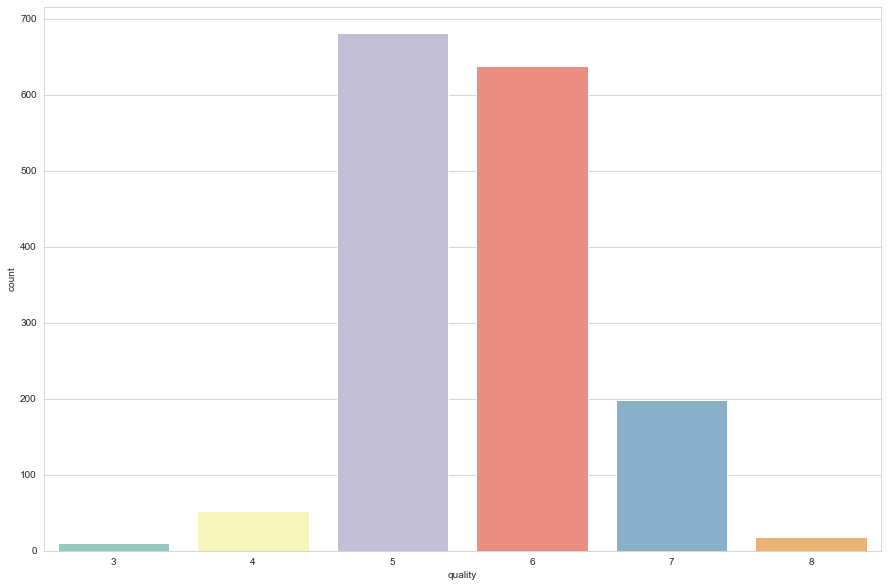

In [8]:
sns.set_style("whitegrid")
sns.set_palette("Set3")

plt.figure(figsize=(15,10))

sns.countplot(data=data, x="quality");

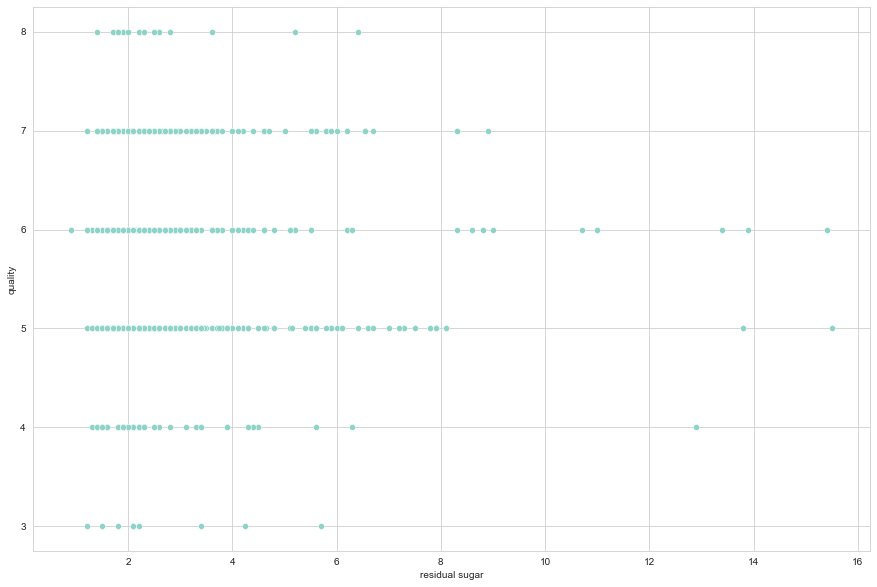

In [9]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=data, x="residual sugar",y="quality");

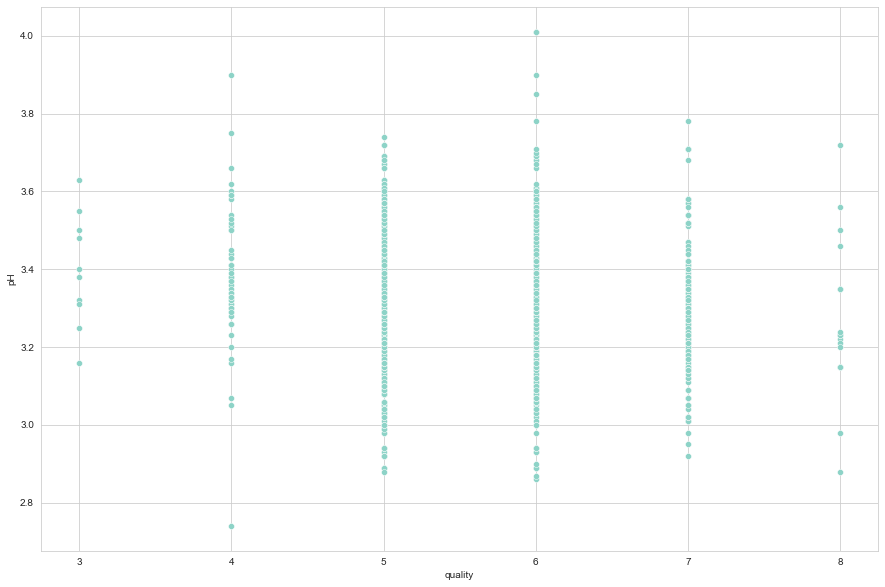

In [10]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=data, x="quality",y="pH");

In [11]:
corr_matrix = data.corr()

corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


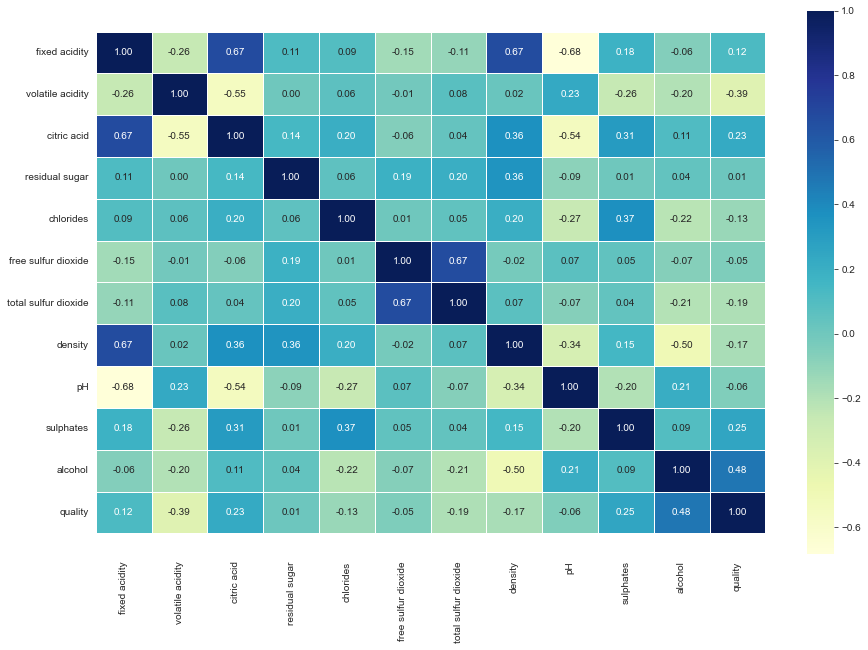

In [12]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
                 fmt=".2f",cmap="YlGnBu")

bottom, top = ax.get_ylim()

ax.set_ylim(bottom+0.5,top-0.5);

In [13]:
X = data.drop("quality", axis=1)

y = data.quality

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.4668511732846282

In [15]:
models = {"Random Forest": RandomForestRegressor(),
         "Logistic Regression": LogisticRegression(),
         "Linear Regression": LinearRegression()
        }

def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    models_score = {}
    
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        
        models_score[name] = model.score(x_test,y_test)
        
    return models_score

In [16]:
model_scores = fit_and_score(models = models,x_train = x_train,
                            x_test = x_test,y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\shami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.4691105535577732,
 'Logistic Regression': 0.5479166666666667,
 'Linear Regression': 0.3365796487403303}

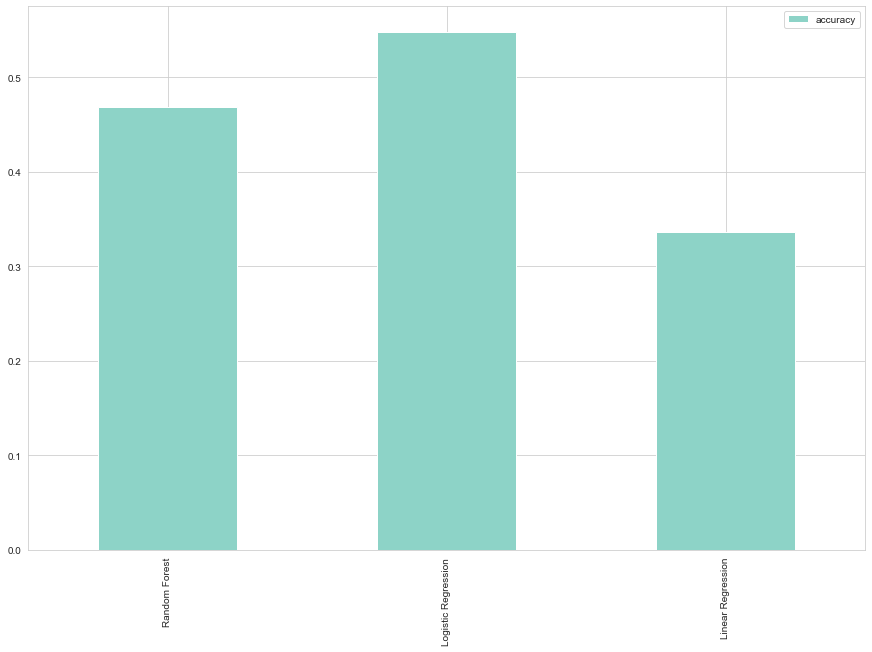

In [17]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

model_compare.T.plot.bar(figsize=(15,10));

In [18]:
def models_score(model,x_train,x_test,y_train,y_test):
    
    model = model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    
    score = {"Mean Absolute Error":MAE,
             "Mean Squared Error":MSE,
             "R2 Score":R2
            }
    
    return score

In [19]:
Random_Forest = models_score(RandomForestRegressor(),x_train,x_test,y_train,y_test)

Random_Forest

{'Mean Absolute Error': 0.44979166666666665,
 'Mean Squared Error': 0.36791749999999995,
 'R2 Score': 0.4642756981880922}

In [20]:
Logistic_Reg = models_score(LogisticRegression(),x_train,x_test,y_train,y_test)

Logistic_Reg

C:\Users\shami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Mean Absolute Error': 0.48333333333333334,
 'Mean Squared Error': 0.5458333333333333,
 'R2 Score': 0.20521263216436736}

In [21]:
Linear_Reg = models_score(LinearRegression(),x_train,x_test,y_train,y_test)

Linear_Reg

{'Mean Absolute Error': 0.5321448855001083,
 'Mean Squared Error': 0.45561486805628815,
 'R2 Score': 0.3365796487403303}

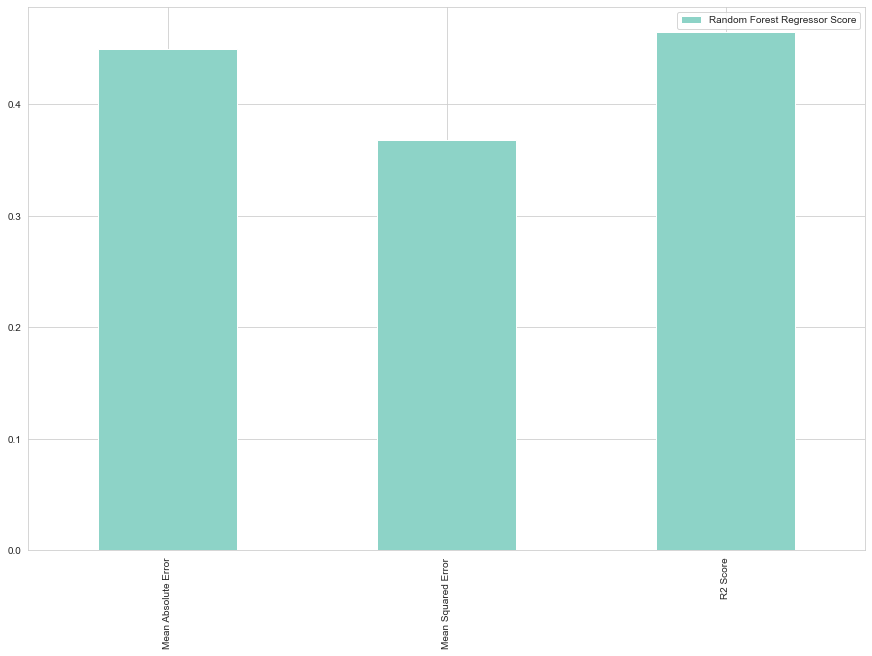

In [22]:
Random_Forest_score = pd.DataFrame(Random_Forest,index=["Random Forest Regressor Score"])

Random_Forest_score.T.plot.bar(figsize=(15,10));

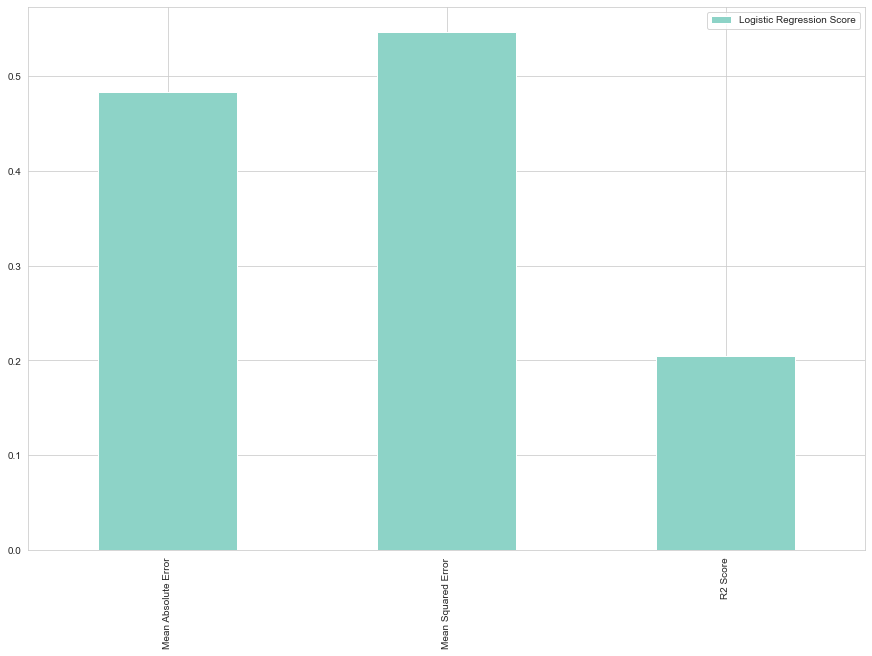

In [23]:
Logistic_Reg_score = pd.DataFrame(Logistic_Reg,index=["Logistic Regression Score"])

Logistic_Reg_score.T.plot.bar(figsize=(15,10));

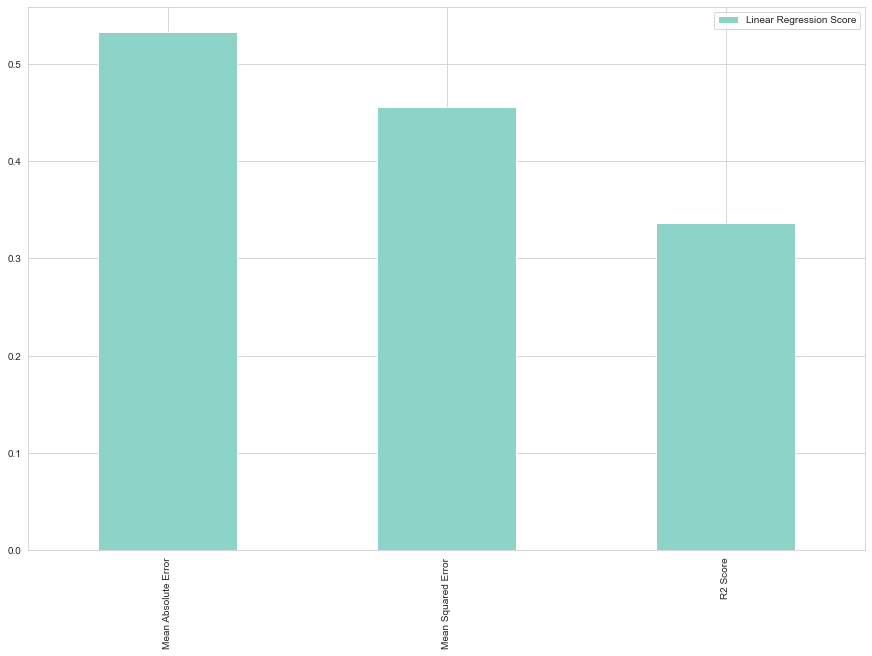

In [24]:
Linear_Reg_score = pd.DataFrame(Linear_Reg,index=["Linear Regression Score"])

Linear_Reg_score.T.plot.bar(figsize=(15,10));

In [26]:
rs_grid = {'min_samples_leaf': np.arange(10,100,10),
         'min_samples_split': np.arange(2,12,2),
         'n_estimators': np.arange(10,50,5),
         'random_state': np.arange(10,45,8)
        }

In [27]:
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=rs_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

In [28]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'min_samples_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45]),
                                        'random_state': array([10, 18, 26, 34, 42])},
                   verbose=True)

In [29]:
rs_rf.best_params_

{'random_state': 10,
 'n_estimators': 25,
 'min_samples_split': 6,
 'min_samples_leaf': 10}

In [30]:
rs_rf_score = models_score(rs_rf,x_train,x_test,y_train,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
rs_rf_score

{'Mean Absolute Error': 0.5087065106904227,
 'Mean Squared Error': 0.4081667935651722,
 'R2 Score': 0.4056687422981864}

In [45]:
def rs_cv_score(model,X,y,x_train,x_test,y_train,y_test):
    
    model.fit(x_train,y_train)
    
    R2 = cross_val_score(rs_rf,X,y,cv=5,scoring="r2")

    R2_score = np.mean(R2)
    
    MAE= cross_val_score(rs_rf,X,y,cv=5,scoring='neg_mean_absolute_error')
    
    MAE_score = abs(np.mean(MAE))
    
    MSE= cross_val_score(rs_rf,X,y,cv=5,scoring="neg_mean_squared_error")
    
    MSE_score = abs(np.mean(MSE))
    
    score = {"Mean Absolute Error": MAE_score,
             "Mean Squared Error": MSE_score,
             "R2 Score": R2_score}
    
    res = pd.DataFrame(score,index=["Accuracy"])
    
    return res

In [46]:
rs_rf_cv_score = rs_cv_score(rs_rf,X,y,x_train,x_test,y_train,y_test)

rs_rf_cv_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Mean Absolute Error,Mean Squared Error,R2 Score
Accuracy,0.505005,0.421391,0.316381


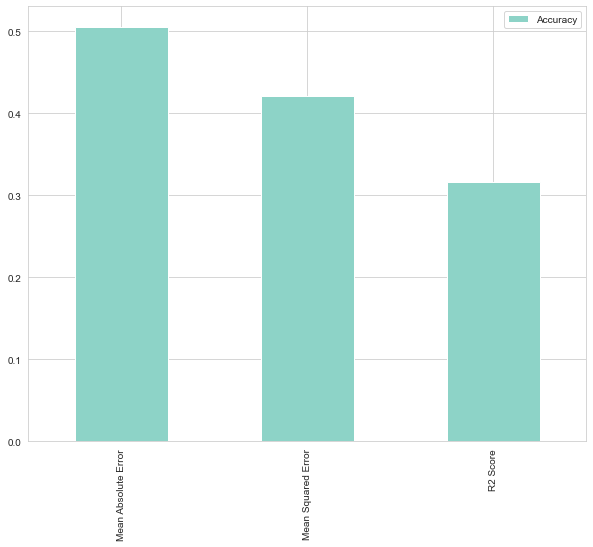

In [49]:
rs_rf_cv_score.T.plot.bar(figsize=(10,8));